### Importing libraries 

In [34]:
import pandas as pd
import statistics
import numpy as np

import unidecode
import re
import string

import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
sns.set_style('darkgrid')

import nltk
import spacy

### Reading Files & Pre-processing 
- Data Scource : https://www.kaggle.com/code/hengzheng/news-category-classifier-val-acc-0-65

In [9]:
news = pd.read_json(r"C:\Users\hornt\Documents\03.PROJECTS -\01. Datasets\P11.News_Category_Dataset_v3.json",lines =True)
print(news.shape)
news.head()

(209527, 6)


,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


In [10]:
news =news[['category','short_description']]

In [16]:
import spacy
nlp =spacy.load("en_core_web_sm")
word_len = []
for i in range(len(news)):
    words =[token.text for token in nlp(news['short_description'][i])]
    word_len.append(len(words))
        
print(len(word_len))       

209527


### EDA 

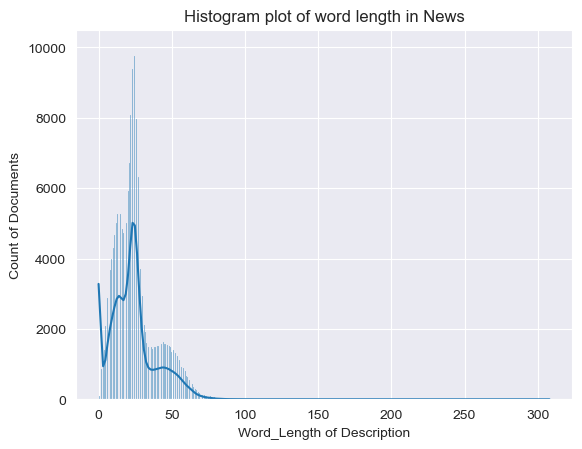

In [26]:
news['word_len'] = word_len
sns.histplot(data =news,x ='word_len',kde =True)
plt.xlabel('Word_Length of Description')
plt.ylabel('Count of Documents')
plt.title('Histogram plot of word length in News')
plt.ylim([0,10500])
plt.show()

In [22]:
news['category'].value_counts()

category
POLITICS          35602
WELLNESS          17945
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9814
PARENTING          8791
HEALTHY LIVING     6694
QUEER VOICES       6347
FOOD & DRINK       6340
BUSINESS           5992
COMEDY             5400
SPORTS             5077
BLACK VOICES       4583
HOME & LIVING      4320
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3653
WOMEN              3572
CRIME              3562
IMPACT             3484
DIVORCE            3426
WORLD NEWS         3299
MEDIA              2944
WEIRD NEWS         2777
GREEN              2622
WORLDPOST          2579
RELIGION           2577
STYLE              2254
SCIENCE            2206
TECH               2104
TASTE              2096
MONEY              1756
ARTS               1509
ENVIRONMENT        1444
FIFTY              1401
GOOD NEWS          1398
U.S. NEWS          1377
ARTS & CULTURE     1339
COLLEGE            1144
LATINO VOICES      1130
CULTURE & ARTS     1074
EDUCATI

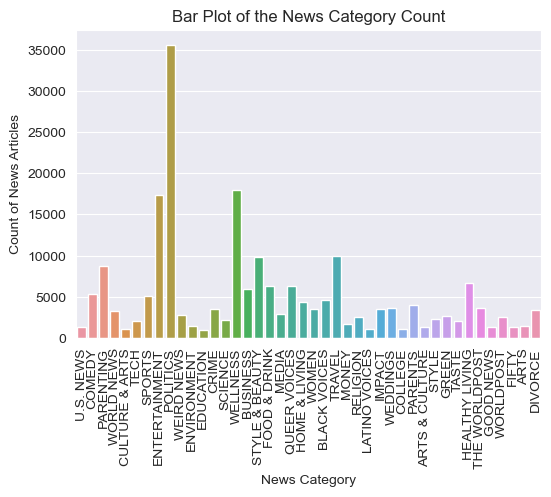

In [31]:
plt.figure(figsize =(6,4))
sns.countplot(data =news,x ='category')
plt.title('Bar Plot of the News Category Count')
plt.xlabel('News Category')
plt.ylabel('Count of News Articles')
plt.xticks(rotation =90)
plt.show()

### Pre-processing

In [32]:
!pip install nltk
import nltk
import spacy

#### Lowercasing 

In [71]:
news['short_description'] = news['short_description'].apply(lambda x :x.lower())
news.head(2)

,category,short_description,word_len
0,U.S. NEWS,health experts said it is too early to predict...,30
1,U.S. NEWS,he was subdued by passengers and crew when he ...,31


#### Punctuation & Stop Word Removal 

In [66]:
print(list(string.punctuation))
print(len(list(string.punctuation)))

###########
extra_punct = [    ',', '.', '"', ':', ')', '(', '!', '?', '|', ';', "'", '$', '&', '/', '[', ']', '>', '%', '=', '#', '*', '+', '\\', '•',  '~', '@', '£',
    '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›', '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…', '“', '★', '”',
    '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾','═', '¦', '║', '―', '¥', '▓', '—', '‹', '─', '▒', '：', '¼', '⊕', '▼',
    '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲','è', '¸', '¾', 'Ã', '⋅', '‘', '∞', '∙', '）', '↓', '、', '│', '（', '»',
    '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø','¹', '≤', '‡', '√', '«', '»', '´', 'º', '¾', '¡', '§', '£', '₤']
print(len(extra_punct))

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']
32
138


In [67]:
punct_list =set(list(string.punctuation) + extra_punct)
print("Total Punctuations :",len(set(list(string.punctuation) + extra_punct)))
print('------------------------------------------------')
punct_str = ''.join(punct_list)
punct_str

Total Punctuations : 135
------------------------------------------------


'\'º+►▬à▀“♥▾₤(∙▒{⊕©]■×$±）・¶«!£é&⋅¦™♪³╩>↑/¹[‡Â=”²?′#╦‹ï°Ã›╚▼†←═_♫（@¸½–¾€*∞•╔´╣▄.`―″|、▪─→);↓¢…│’★，â¤,¨√<^"}║☆Øè:❤█~¯»·▓¥▲░-‘≤\\╗●%¼：−♦¡—®¬§¿'

In [49]:
from spacy.lang.en.stop_words import STOP_WORDS

In [111]:
nlp = spacy.load("en_core_web_sm")
def preprocess(text):
    doc = nlp(text)
    no_stop_words = [token.lemma_ for token in doc if not token.is_stop and token not in punct_list]
    return " ".join(no_stop_words)  

In [112]:
nlp = spacy.load("en_core_web_sm")
#function to remove speacial characters - The one's not in [a-Z] [A-Z] [0-9] and space
def rem_spl_char(x):
    x = re.sub(r'[^\w\s]+', ' ', x)
    x = ' '.join(x.split(' '))
    return x   

In [113]:
#Removing accented characters (unicode to ascii)
def rem_accented_chars(x):
    return unidecode.unidecode(x)

In [116]:
news['short_description_new'] = news['short_description'].apply(rem_spl_char)
news['short_description_new'] = news['short_description'].apply(rem_accented_chars)
news['short_description_new'] = news['short_description'].apply(preprocess)

In [119]:
news =news[['category','short_description_new']]

### Model Building 

In [122]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(news['short_description_new'], news['category'], 
                                                    test_size=0.2,random_state =45,stratify =news['category'])
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(167621,) (41906,) (167621,) (41906,)


In [123]:
v = TfidfVectorizer()
X_train_cv = v.fit_transform(list(X_train))
X_test_cv = v.transform(list(X_test))
print(X_train_cv.shape)
print(X_test_cv.shape)

(167621, 68655)
(41906, 68655)


In [124]:
params =  {'alpha':[0.001,0.01,0.1,0.25,0.3,0.35,0.5,0.6,0.7,0.8,0.9,1,2,5]}
model = GridSearchCV(MultinomialNB(),param_grid=params,cv=3,scoring='accuracy')
model.fit(X_train_cv,y_train)
y_pred = model.predict(X_test_cv)
print(classification_report(y_test, y_pred))

                precision    recall  f1-score   support

          ARTS       0.21      0.04      0.07       302
ARTS & CULTURE       0.33      0.03      0.05       268
  BLACK VOICES       0.34      0.11      0.17       917
      BUSINESS       0.36      0.21      0.27      1198
       COLLEGE       0.47      0.03      0.07       229
        COMEDY       0.27      0.09      0.14      1080
         CRIME       0.42      0.25      0.31       712
CULTURE & ARTS       0.45      0.12      0.18       215
       DIVORCE       0.72      0.36      0.48       685
     EDUCATION       0.50      0.06      0.11       203
 ENTERTAINMENT       0.37      0.47      0.41      3473
   ENVIRONMENT       0.54      0.18      0.27       289
         FIFTY       0.28      0.02      0.03       280
  FOOD & DRINK       0.51      0.55      0.53      1268
     GOOD NEWS       0.28      0.02      0.03       280
         GREEN       0.35      0.11      0.17       524
HEALTHY LIVING       0.20      0.05      0.08  

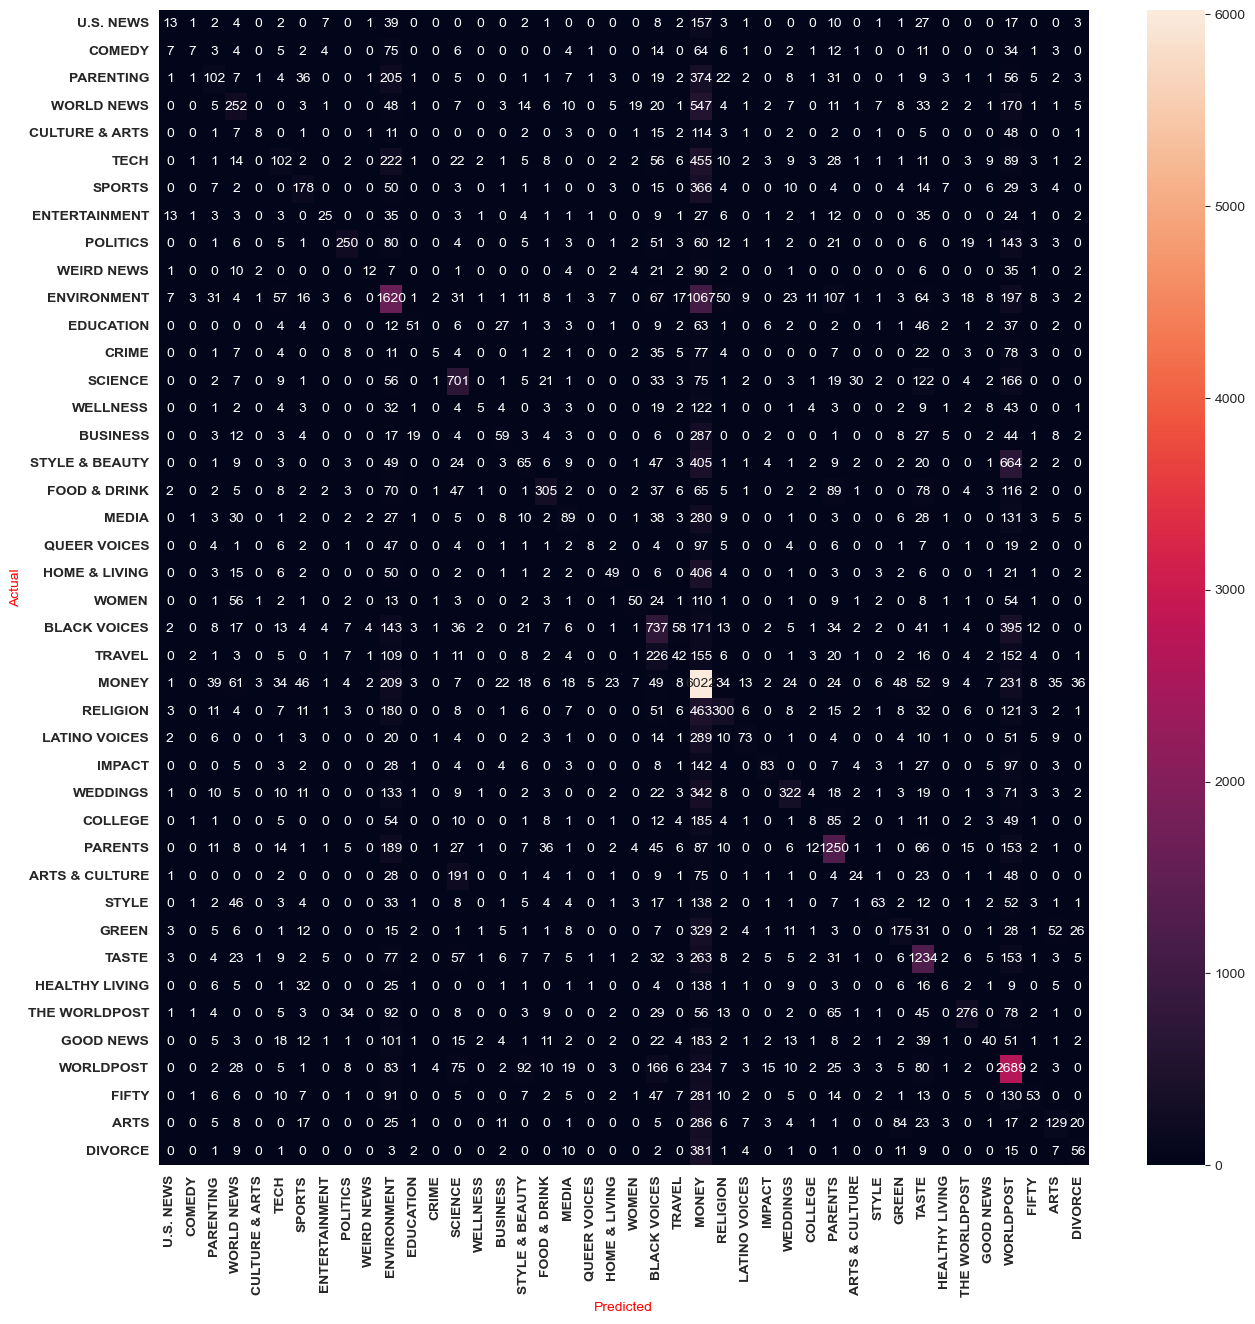

In [128]:
labels = list(news.category.unique())
cm =pd.DataFrame(confusion_matrix(y_true =y_test,y_pred =y_pred))
fig,ax =plt.subplots(figsize =(15,15))
sns.heatmap(cm,annot =True ,fmt ='0.0f',ax =ax)
ax.set_xlabel('Predicted',color ='red',size =10)
ax.set_ylabel('Actual',color ='red',size =10)
ax.xaxis.set_ticklabels(labels,rotation =90,weight ='bold')
ax.yaxis.set_ticklabels(labels,rotation =0,weight ='bold')
plt.show()